# Homework #7 MESA models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We'll make some a class to store the data from the model files.  

In [2]:
class Profile:
    def __init__(self, pfile):
        p = np.loadtxt(pfile)
        self.r = p[:,0]
        self.m = p[:,1]
        self.rho = p[:,2]
        self.T = p[:,3]
        self.P = p[:,4]
        self.mu = p[:,5]
        self.mu_e = p[:,6]
        self.L = p[:,7]
        self.X = p[:,8]
        self.Y = p[:,9]
        self.grad_a = p[:,10]
        self.grad_T = p[:,11]
        self.q = p[:,12]
        
        # the age is specified on the first line
        with open(pfile) as pf:
            line = pf.readline()
            self.age = line.split("=")[-1].split()[0]

Fundamental constants

In [3]:
# CGS constants
k_B = 1.38e-16
m_u = 1.66e-24
m_e = 9.11e-28
c = 3.e10
h = 6.63e-27
a = 5.67e-15

## 1. the solar convection zone

In our homework, we found the convective zone temperature structure is approximately:

$$T(r) = T_\mathrm{base} - \left ( 1 - \frac{1}{\gamma} \right ) \frac{\mu m_u GM_\odot}{k} \left (\frac{1}{R_\mathrm{base}} - \frac{1}{r}\right )$$

Here we'll compare this to the MESA model for the $1~M_\odot$ star.

In [4]:
# constants in CGS
m_u = 1.66e-24
G = 6.68e-8
k = 1.38e-16
M_sun = 2.e33
R_sun = 7.e10

First we read in the data

In [5]:
p = Profile("M1.0_profile_H_simple.out")

I'll find the radius as the first zone (from the center) where the adiabatic excess, $\nabla - \nabla_\mathrm{ad}$ gets close to 0

In [6]:
idx = np.where(np.abs(p.grad_T - p.grad_a) <= 1.e-3)[0][0]

and we can get the temperature and radius there

In [7]:
T_base = p.T[idx]
R_base = p.r[idx] * R_sun

Here's our analytic function to plot

In [8]:
def T(r):
    gamma = 5./3.
    mu = 0.6
    return T_base - (1.0 - 1.0 / gamma) * mu * m_u * G * M_sun / k * (1/R_base - 1/r)

and now we can plot the data and the analytic comparison

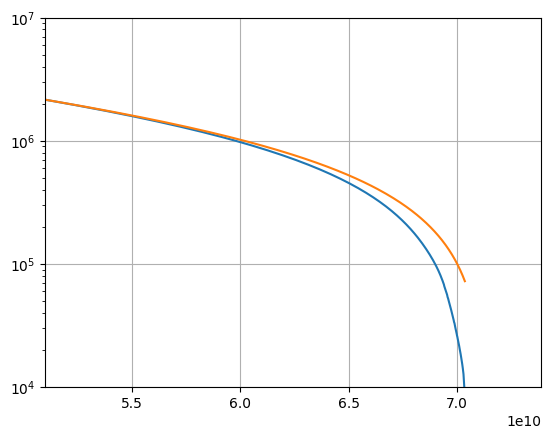

In [9]:
fig, ax = plt.subplots()
ax.plot(p.r * R_sun, p.T)
ax.plot(p.r * R_sun, T(p.r * R_sun))
ax.set_xlim(left=R_base)
ax.set_ylim(1.e4, 1.e7)
ax.set_yscale("log")
ax.grid()

Notice that the temperature structure compares quite well until we reach the surface of the star.

## 2. fully-convective polytrope

We want to compare a fully-convective polytrope to our MESA model for the  $0.3~M_\odot$ star.

We know that:

$$P = K \rho^{\gamma_a} = \frac{\rho k T}{\mu m_u}$$

so we can find that 

$$T = \frac{K \rho^{\gamma_a - 1} \mu m_u}{k}$$

and for our star, $\gamma_a = 5/3$.

We'll take the value of $K$ we found in homework 5.

In [10]:
p = Profile("M0.3_profile_H_simple.out")

In [11]:
K = 3.4e13
gamma_a = 5./3.

We'll take $\mu$ as the value in the center of our model

In [12]:
mu = p.mu[0]

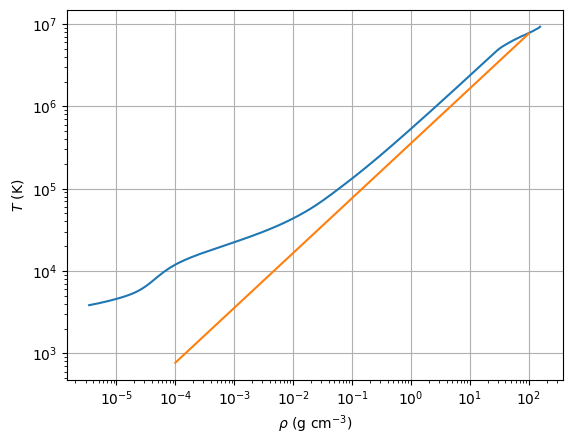

In [13]:
fig, ax = plt.subplots()
ax.loglog(p.rho, p.T)

rho = np.logspace(-4, 2, 100)
T_poly = K * rho**(gamma_a - 1) * mu * m_u / k_B

ax.loglog(rho, T_poly)
ax.set_xlabel(r"$\rho~ \mathrm{(g~cm^{-3})}$")
ax.set_ylabel(r"$T~\mathrm{(K)}$")
ax.grid()

We see that for much of the star (until we near the surface) the trend of the polytrope model is very close to the trend from the MESA star.